In [12]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# importing libraries/modules, and functions
import pandas as pd
import numpy as np
import scipy.stats as stats

# visualization libraries
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# created zillow library and functions
from wrangle import get_zillow_dataset, clean_zillow_dataset, zillow_outliers, train_validate_test_split

# sklearn modules and scaling functions
import sklearn

import env
from env import user, password, host, get_connection

----
``In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.``

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7. Come up with some initial hypotheses based on your goal of predicting property value.

8. Visualize all combinations of variables in some way.

9. Run the appropriate statistical tests where needed.

10. What independent variables are correlated with the dependent variable, home value?

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13. Explore your dataset with any other visualizations you think will be helpful.

----
#### ``Importing the "2017 properties" dataset for single family homes``

- creating a csv for future exploration
- this should help to better understand future analysis done on this dataset

In [13]:
# creating the sql query to import all columns from the 2017 zillow properties dataset

# query = ''' 
# SELECT *
# FROM properties_2017
# JOIN propertylandusetype using (propertylandusetypeid)
# WHERE propertylandusedesc = "Single Family Residential"
# '''

# creating sql url
# url = get_connection(user, password, host, "zillow" )

# creating the dataframe
# df = pd.read_sql(query, url)

# generating a .csv file and sending to local directory
# df.to_csv("/Users/mijailmariano/codeup-data-science/regression-exercises/full_zillow.csv")

----
**``1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.``**

**``2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.``**


In [14]:
# importing and cleaning zillow dataset
zillow_df = get_zillow_dataset()
zillow_df = clean_zillow_dataset(zillow_df)

print(f'Initial zillow dataset shape: {zillow_df.shape}')
zillow_df.head(5)

Initial zillow dataset shape: (2140235, 7)


,bedroom_count,bath_count,finished_sq_feet,home_value,year_built,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
6,3,4.0,1620.0,847770.0,2011,10244.94,6037
7,3,2.0,2077.0,646760.0,1926,7924.68,6037
11,0,0.0,1200.0,5328.0,1972,91.60,6037
14,0,0.0,171.0,6920.0,1973,255.17,6037


In [15]:
# handling outliers 
zillow_df = zillow_outliers(zillow_df)
zillow_df.shape

(2065188, 7)

In [16]:
# splitting the data into train, validate, and test
train, validate, test = train_validate_test_split(zillow_df)

print(f'trains shape: {train.shape}')
print(f'validate shape: {validate.shape}')
print(f'test shape: {test.shape}')

trains shape: (1156505, 7)
validate shape: (495645, 7)
test shape: (413038, 7)


In [17]:
# setting independent/dependent variables in ea. sub-dataset

X_train = train.drop(columns=["home_value", "tax_amount"])
y_train = train.home_value

X_validate = validate.drop(columns=["home_value", "tax_amount"])
y_validate = validate.home_value

X_test = test.drop(columns=["home_value", "tax_amount"])
y_test = test.home_value

-----
#### ``Uni/Multivariate Exploration:``

In [18]:
col_lst = list(X_train.columns)
col_lst

['bedroom_count', 'bath_count', 'finished_sq_feet', 'year_built', 'fips']

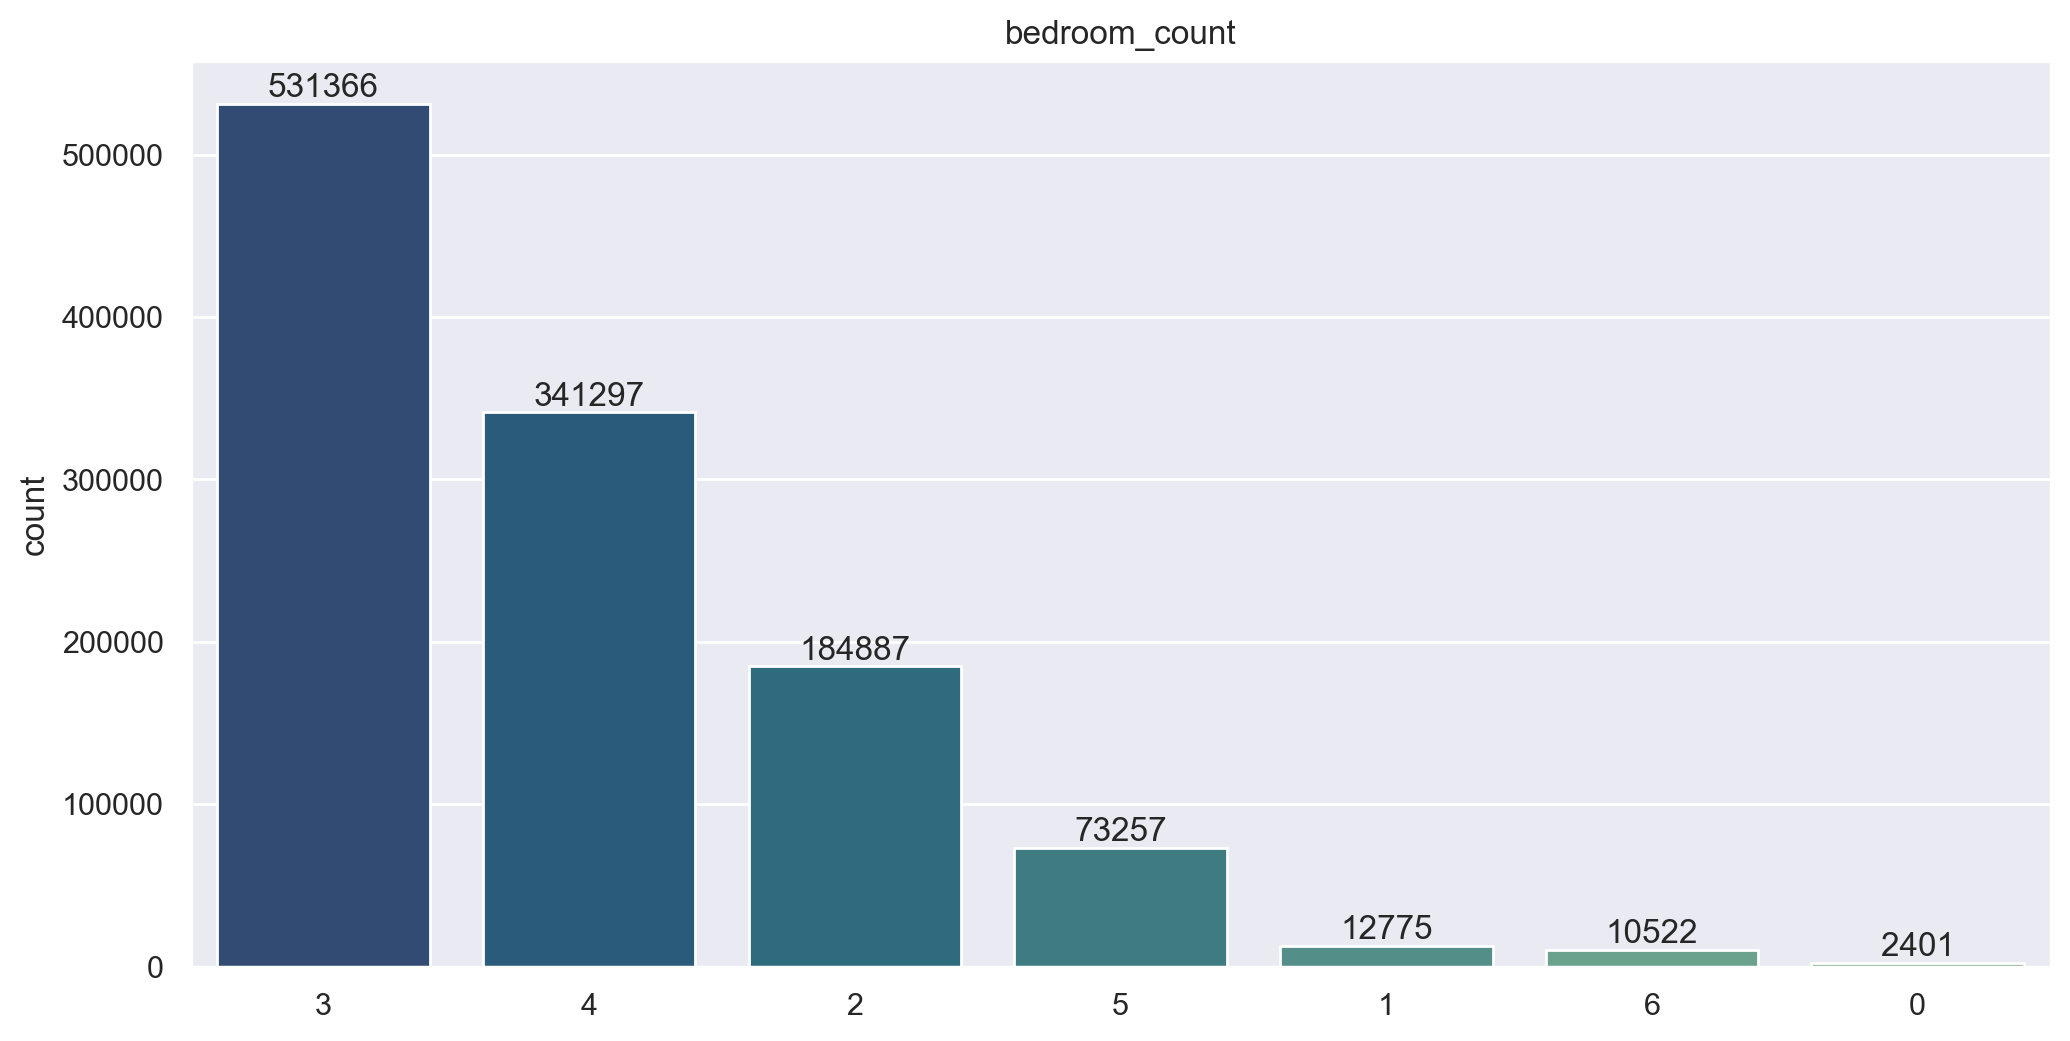

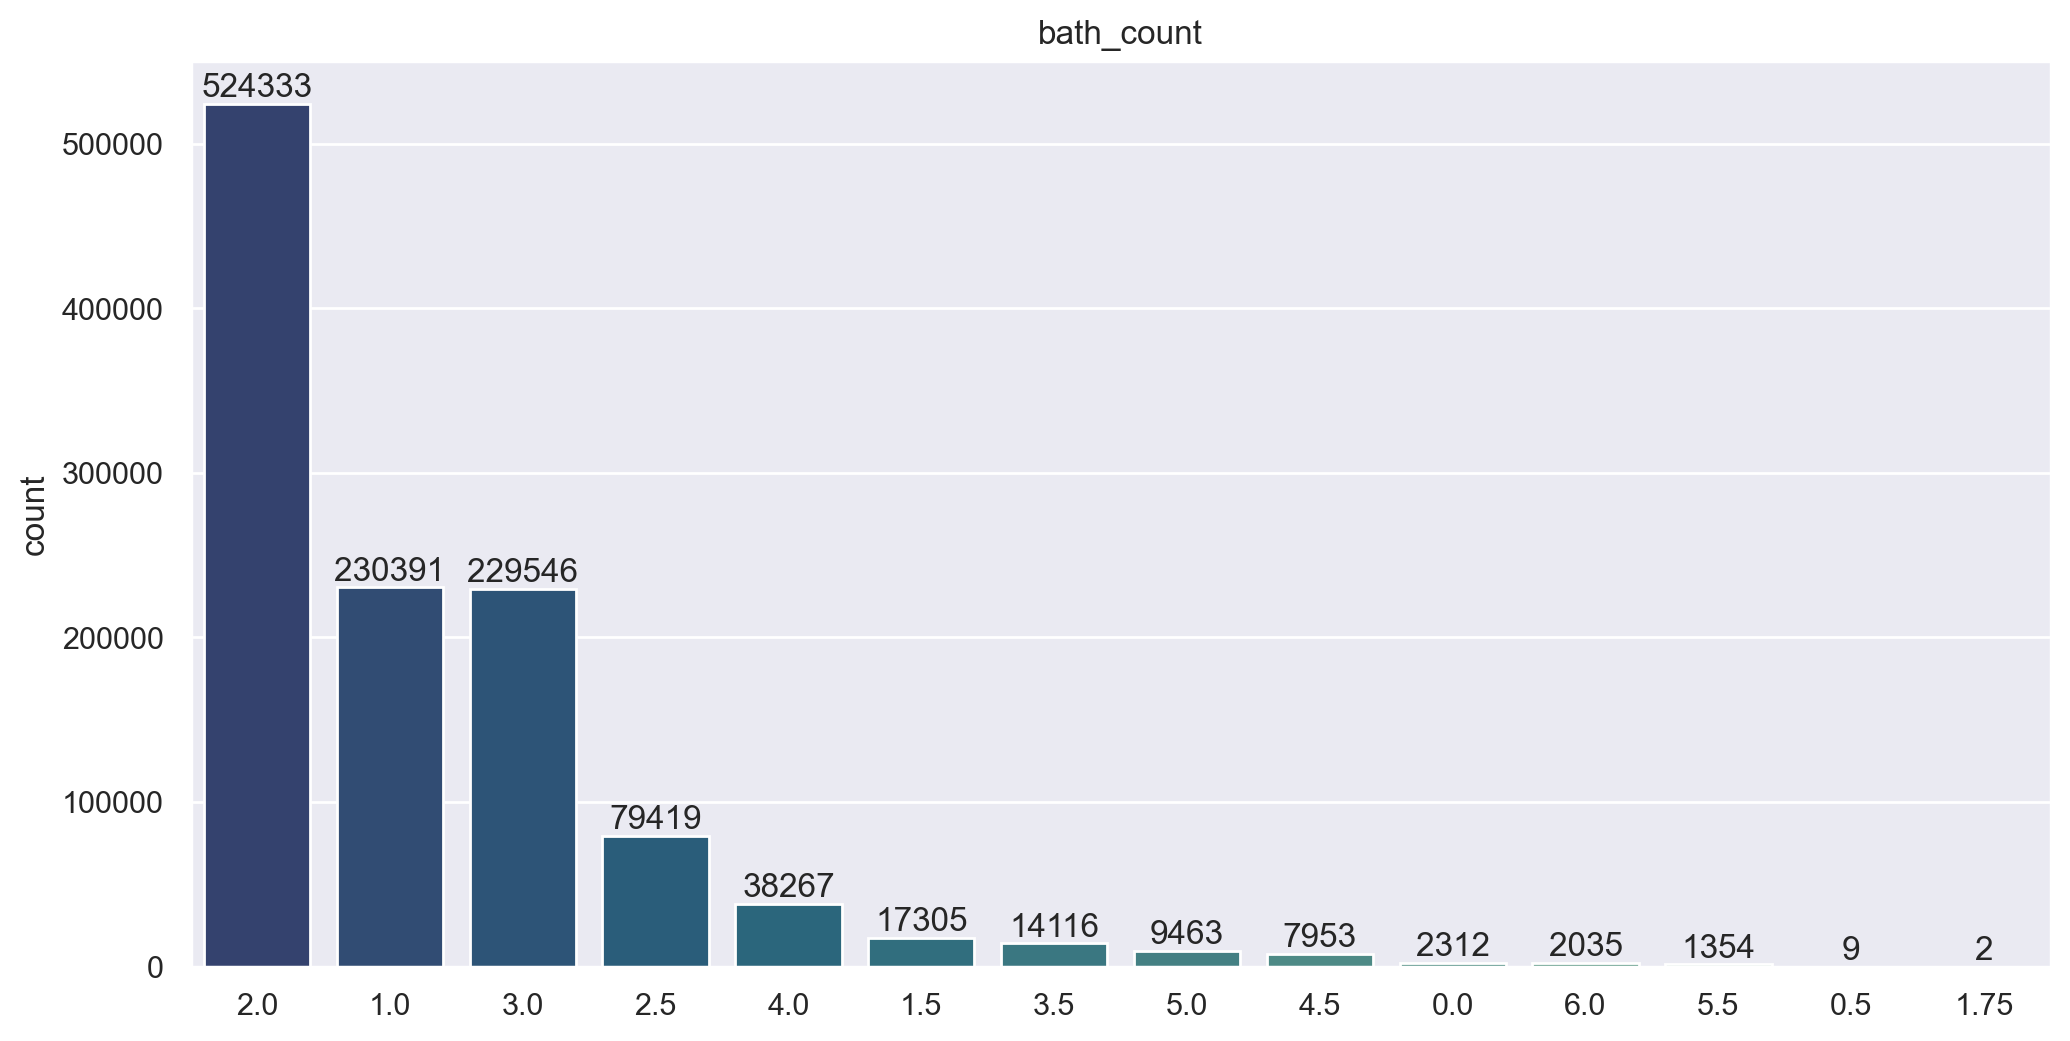

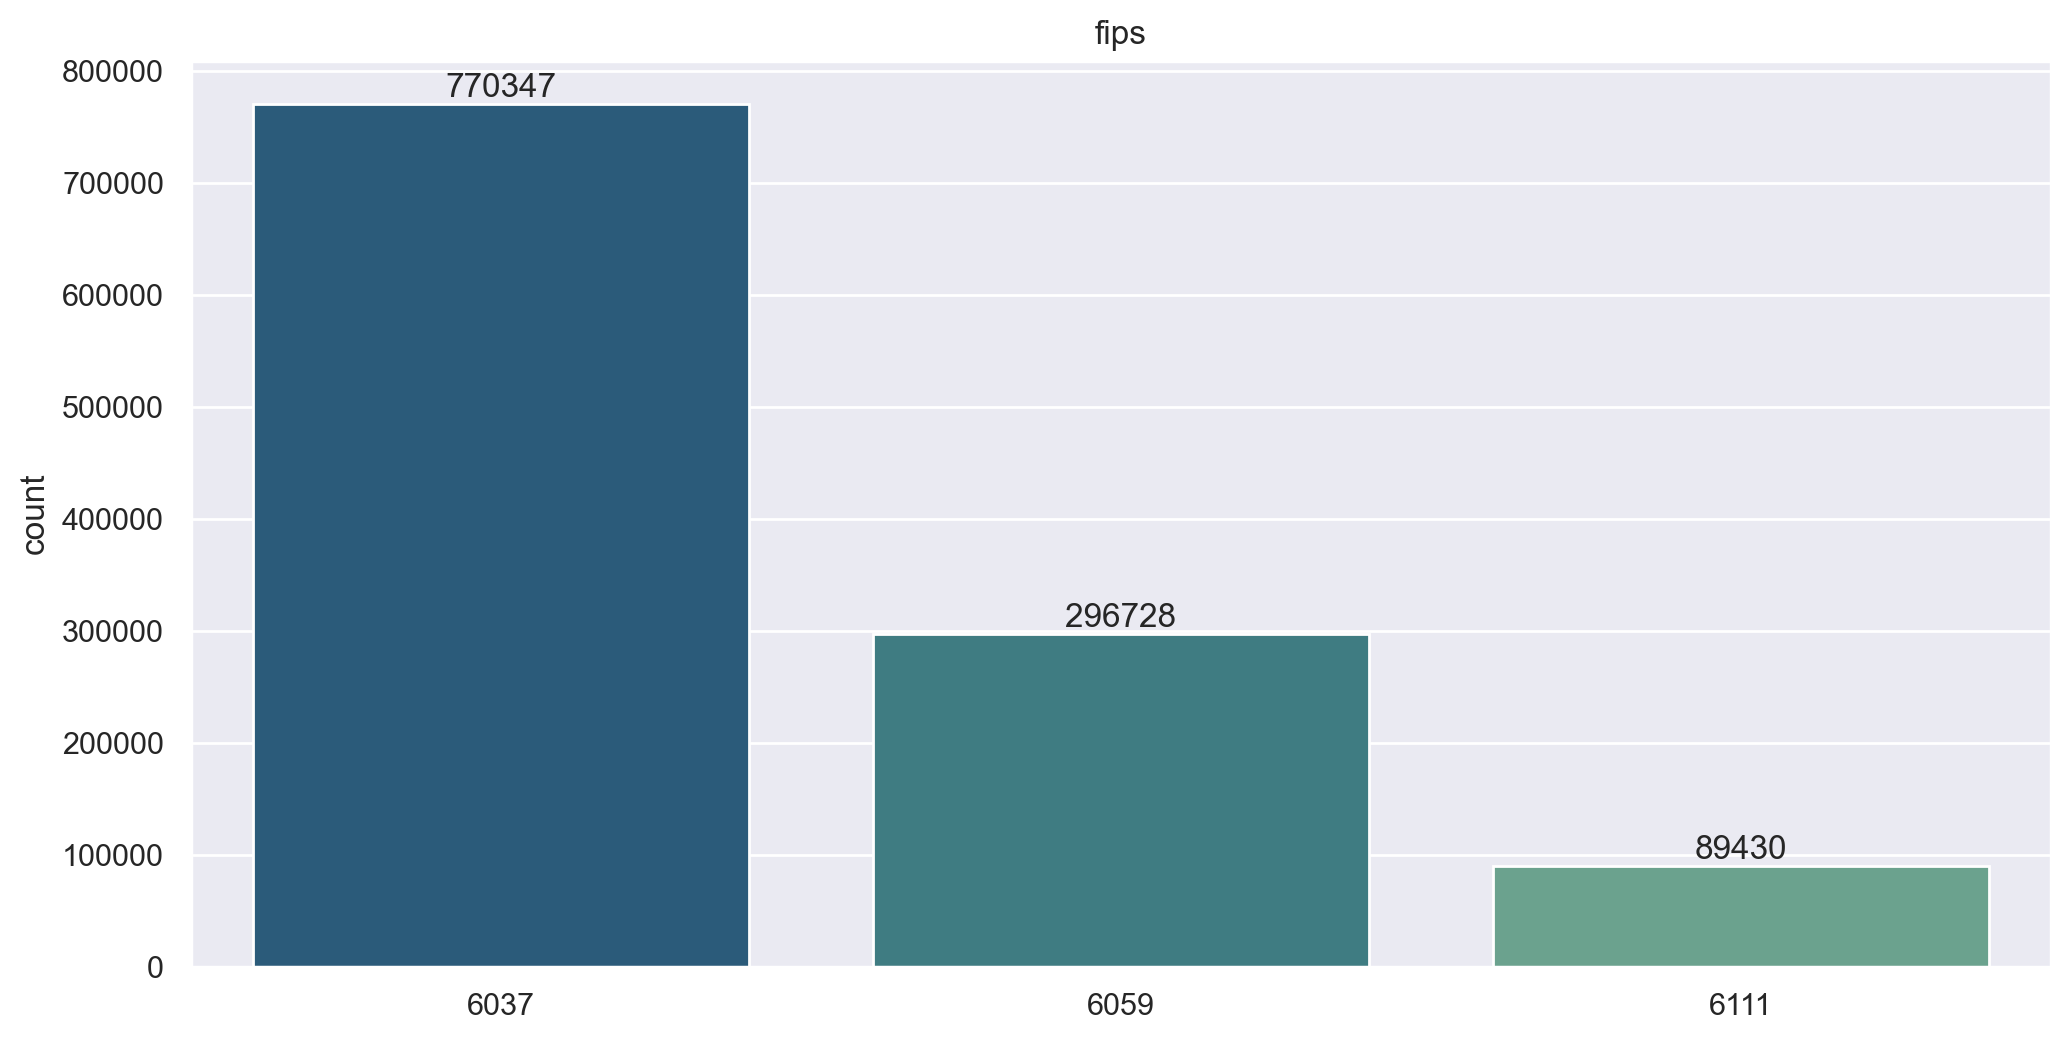

In [19]:
# count/freqeuncy plot for bedroom, bath, and "fips" columns
# consider creating a function that can execute this action in the future**

for column in X_train[["bedroom_count", "bath_count", "fips"]]:
    plt.figure(figsize=(12, 6))
    sns.set(font_scale = 1)
    ax = sns.countplot(x = column, 
                    data = X_train,
                    palette = "crest_r",
                    order = X_train[column].value_counts().index)
    ax.bar_label(ax.containers[0])
    ax.set(xlabel = None)
    plt.title(column)
    plt.show()

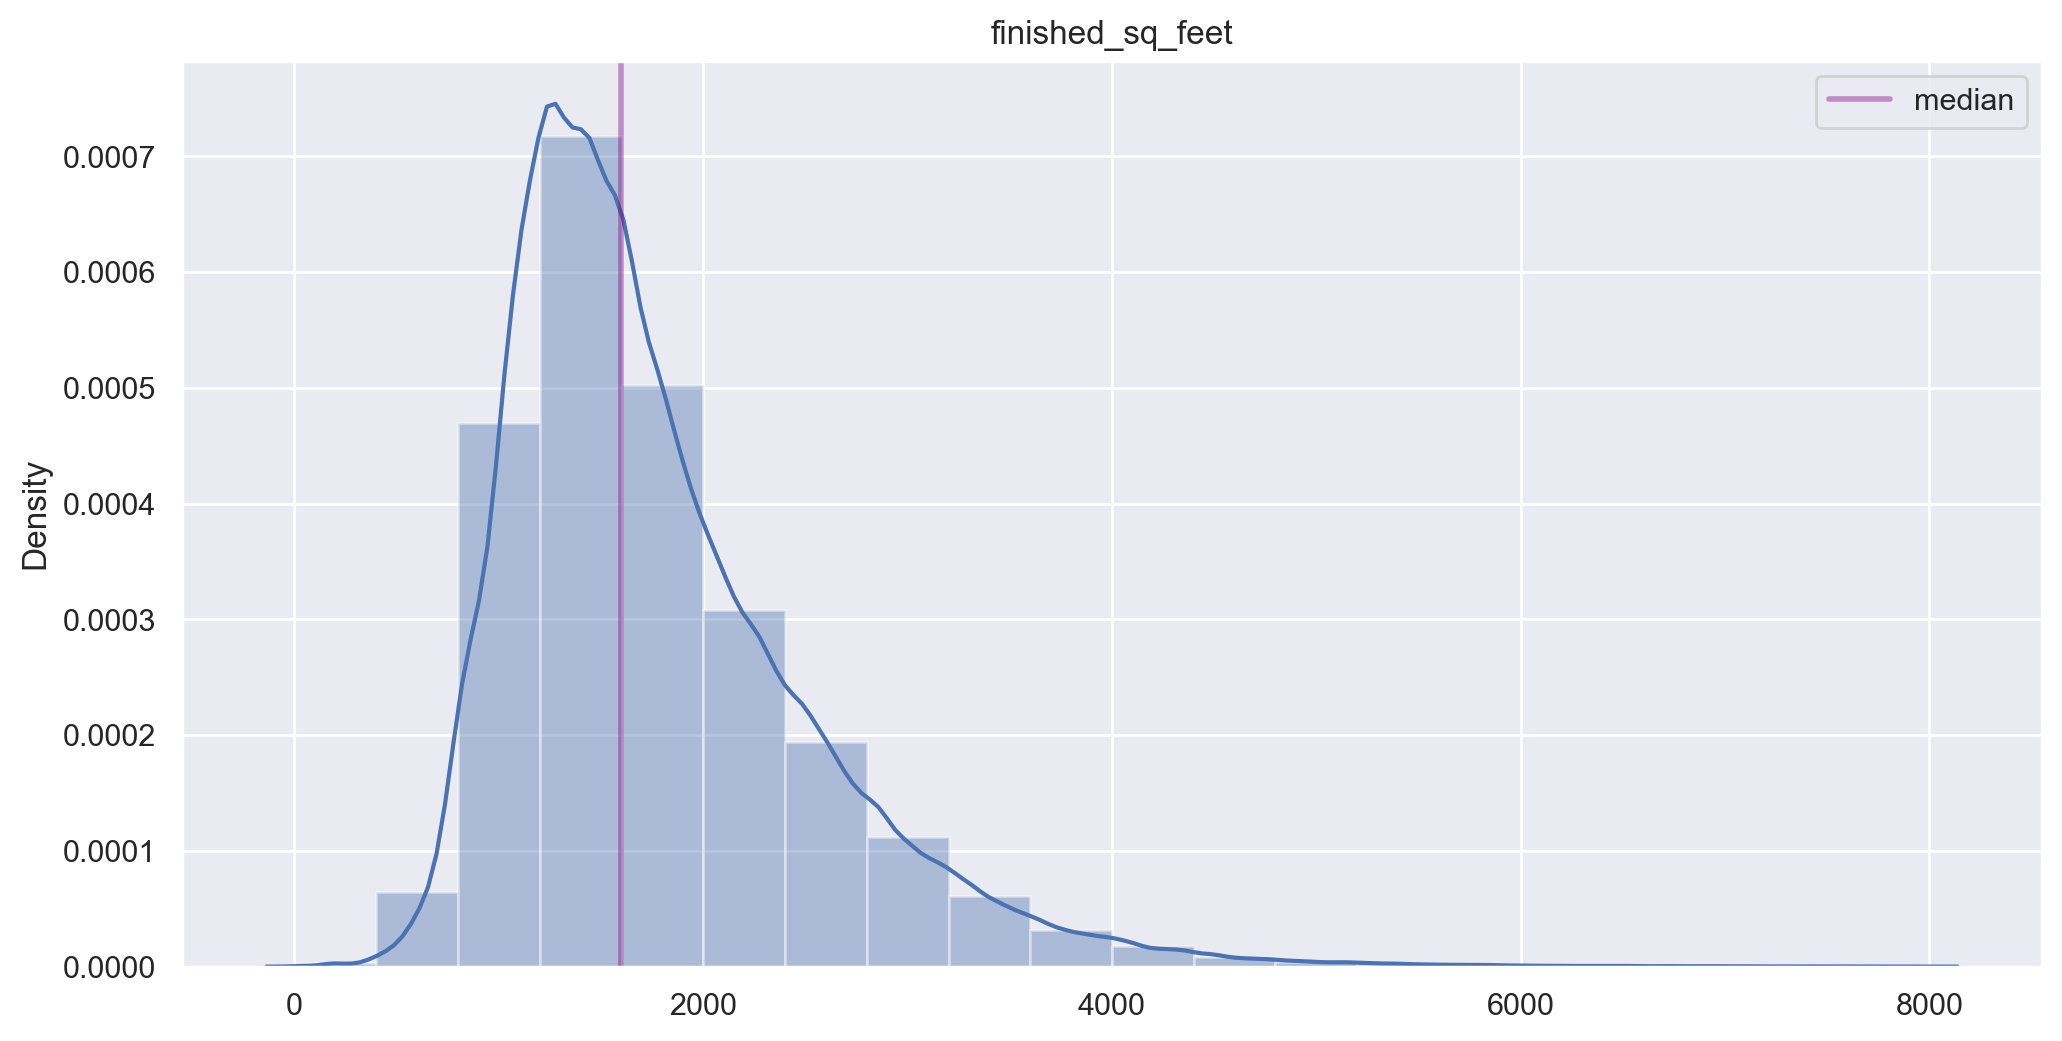

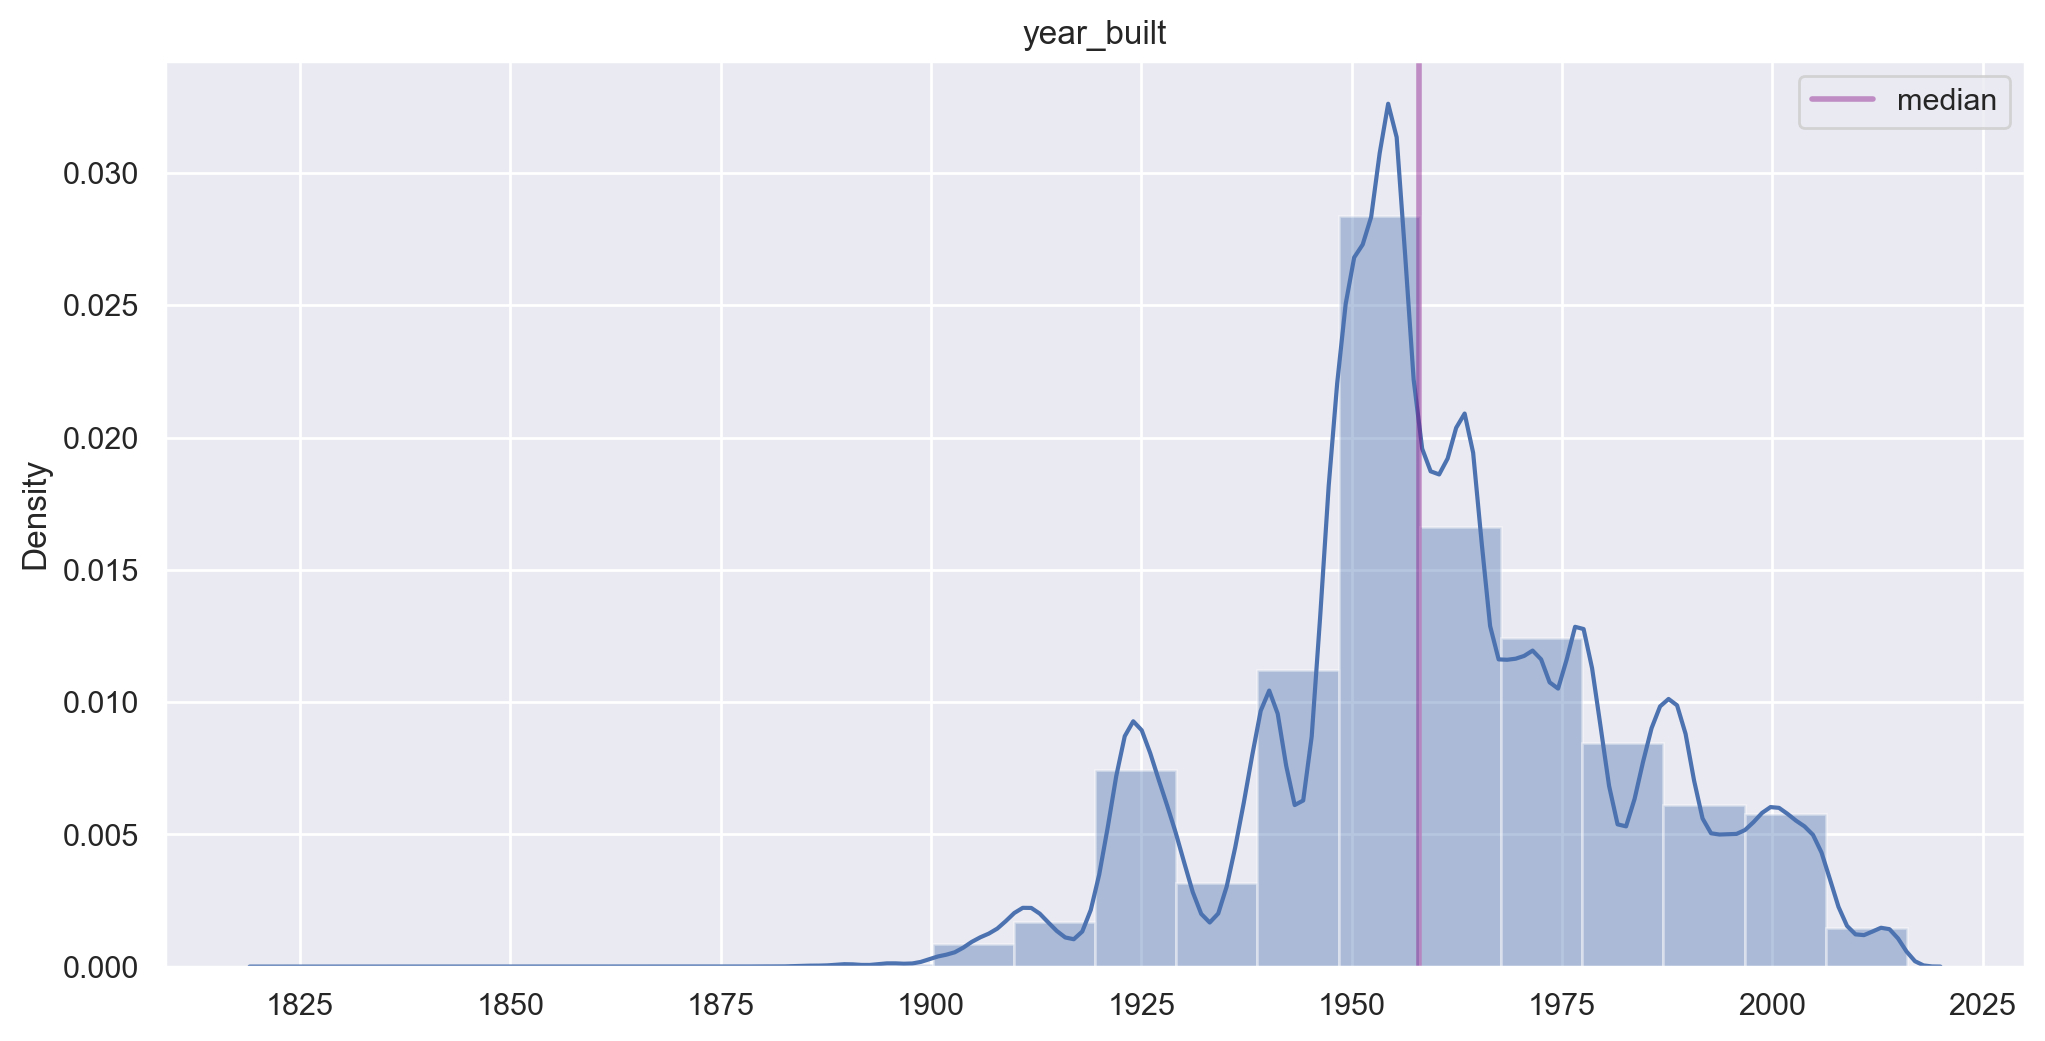

In [20]:
# plotting year built and finished square feet columns
# consider creating a function that can execute this action in the future**


for column in X_train[["finished_sq_feet", "year_built"]]:
    plt.figure(figsize=(12, 6))
    ax = sns.distplot(x = X_train[column], 
                    bins = 20,
                    kde = True)
    ax.set(xlabel = None)
    plt.axvline(X_train[column].median(), linewidth = 2, color = 'purple', alpha = 0.4, label = "median")
    plt.title(column)
    ax.ticklabel_format(style = "plain") # removing axes scientific notation
    plt.legend()
    plt.show()

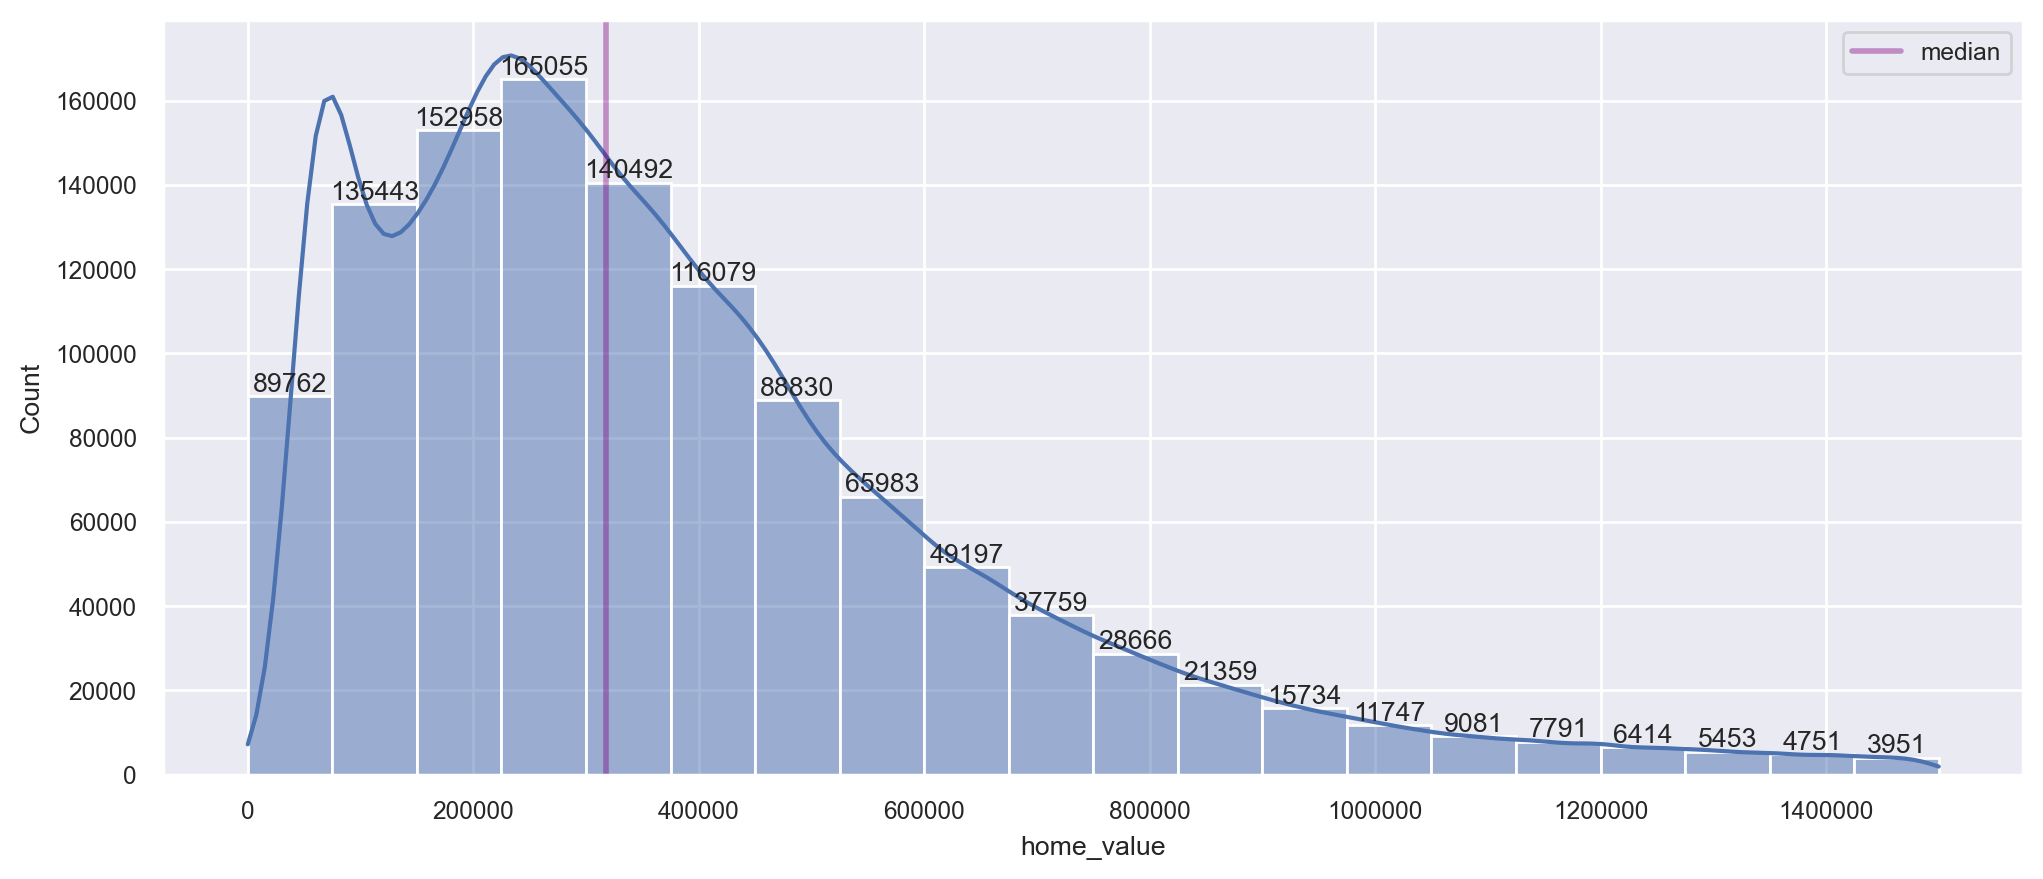

In [21]:
# plotting the target variable

plt.figure(figsize = (12, 5))
sns.set(font_scale = .8)
ax = sns.histplot(y_train, bins = 20, kde = True)

ax.ticklabel_format(style = "plain") # removing axes scientific notation 
ax.bar_label(ax.containers[0])

plt.axvline(y_train.median(), linewidth = 2, color = 'purple', alpha = 0.4, label = "median")
plt.legend()
plt.show()

In [22]:
feature_lst = X_train.columns
feature_lst

Index(['bedroom_count', 'bath_count', 'finished_sq_feet', 'year_built',
       'fips'],
      dtype='object')

In [23]:
X_train.select_dtypes(include = "float").columns

Index(['bath_count', 'finished_sq_feet'], dtype='object')

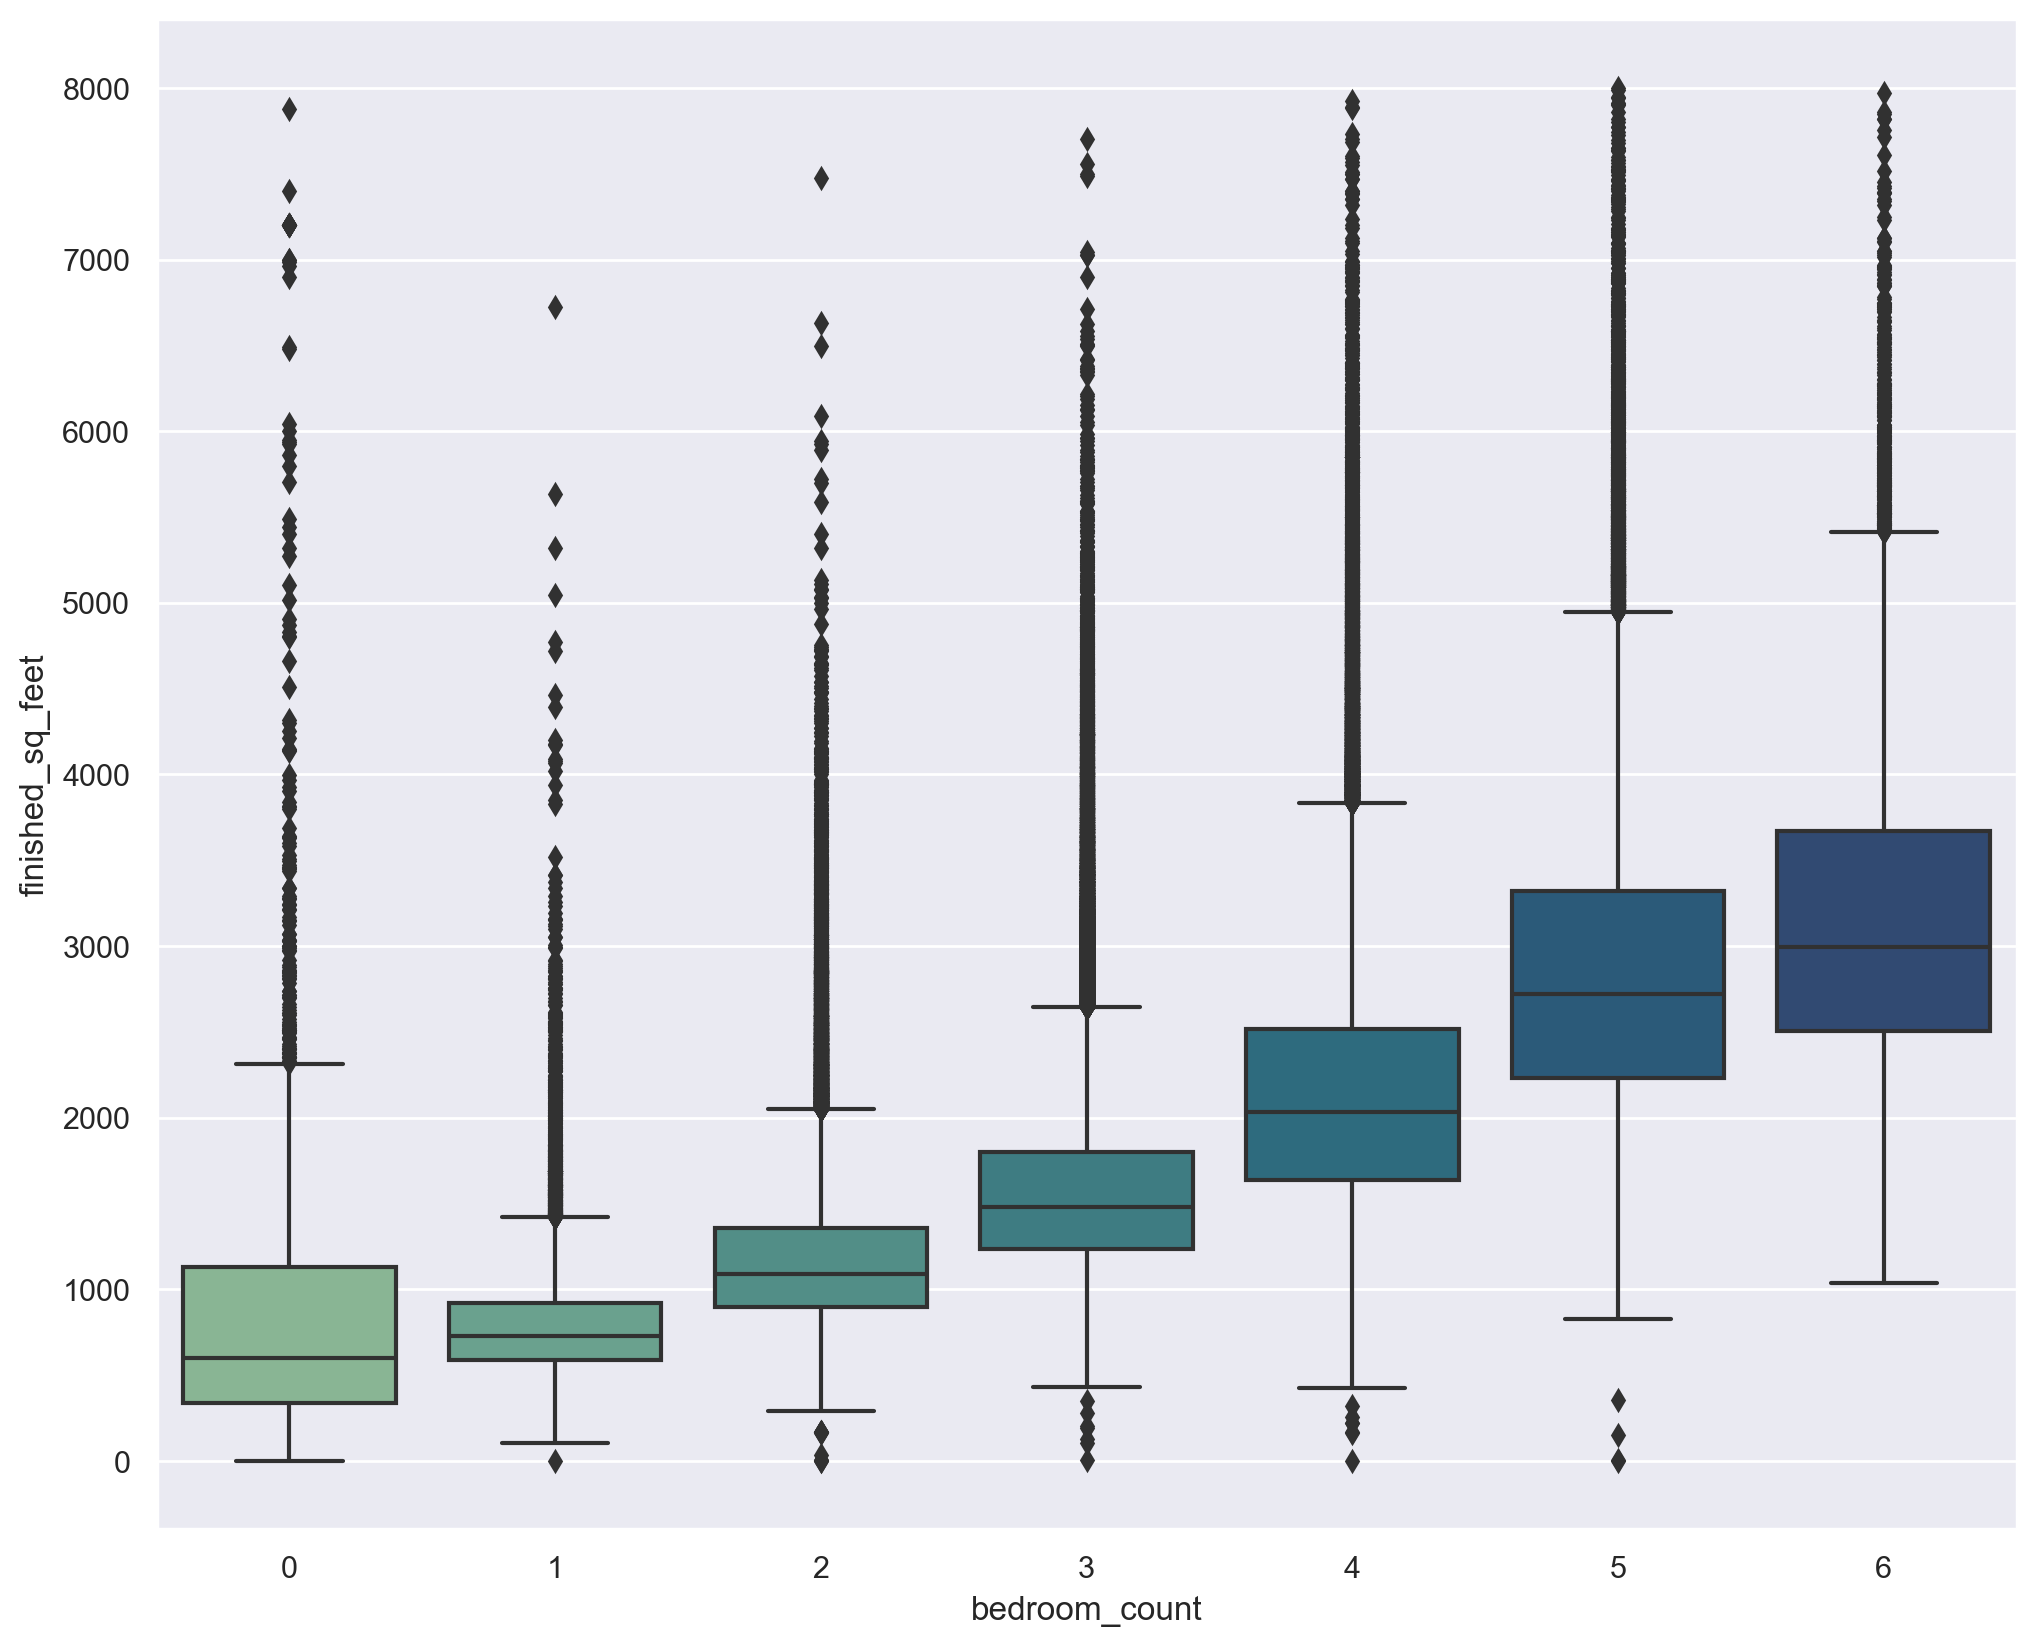

In [24]:
# plotting subplots for ea. dataset feature against another
# discrete variables: bedroom count, year built
# continuous variables: bath count, finished square feet

plt.figure(figsize = (12, 10))
sns.set(style = "darkgrid")
sns.boxplot(x = "bedroom_count", y = "finished_sq_feet", data = X_train, palette = "crest")
plt.show()

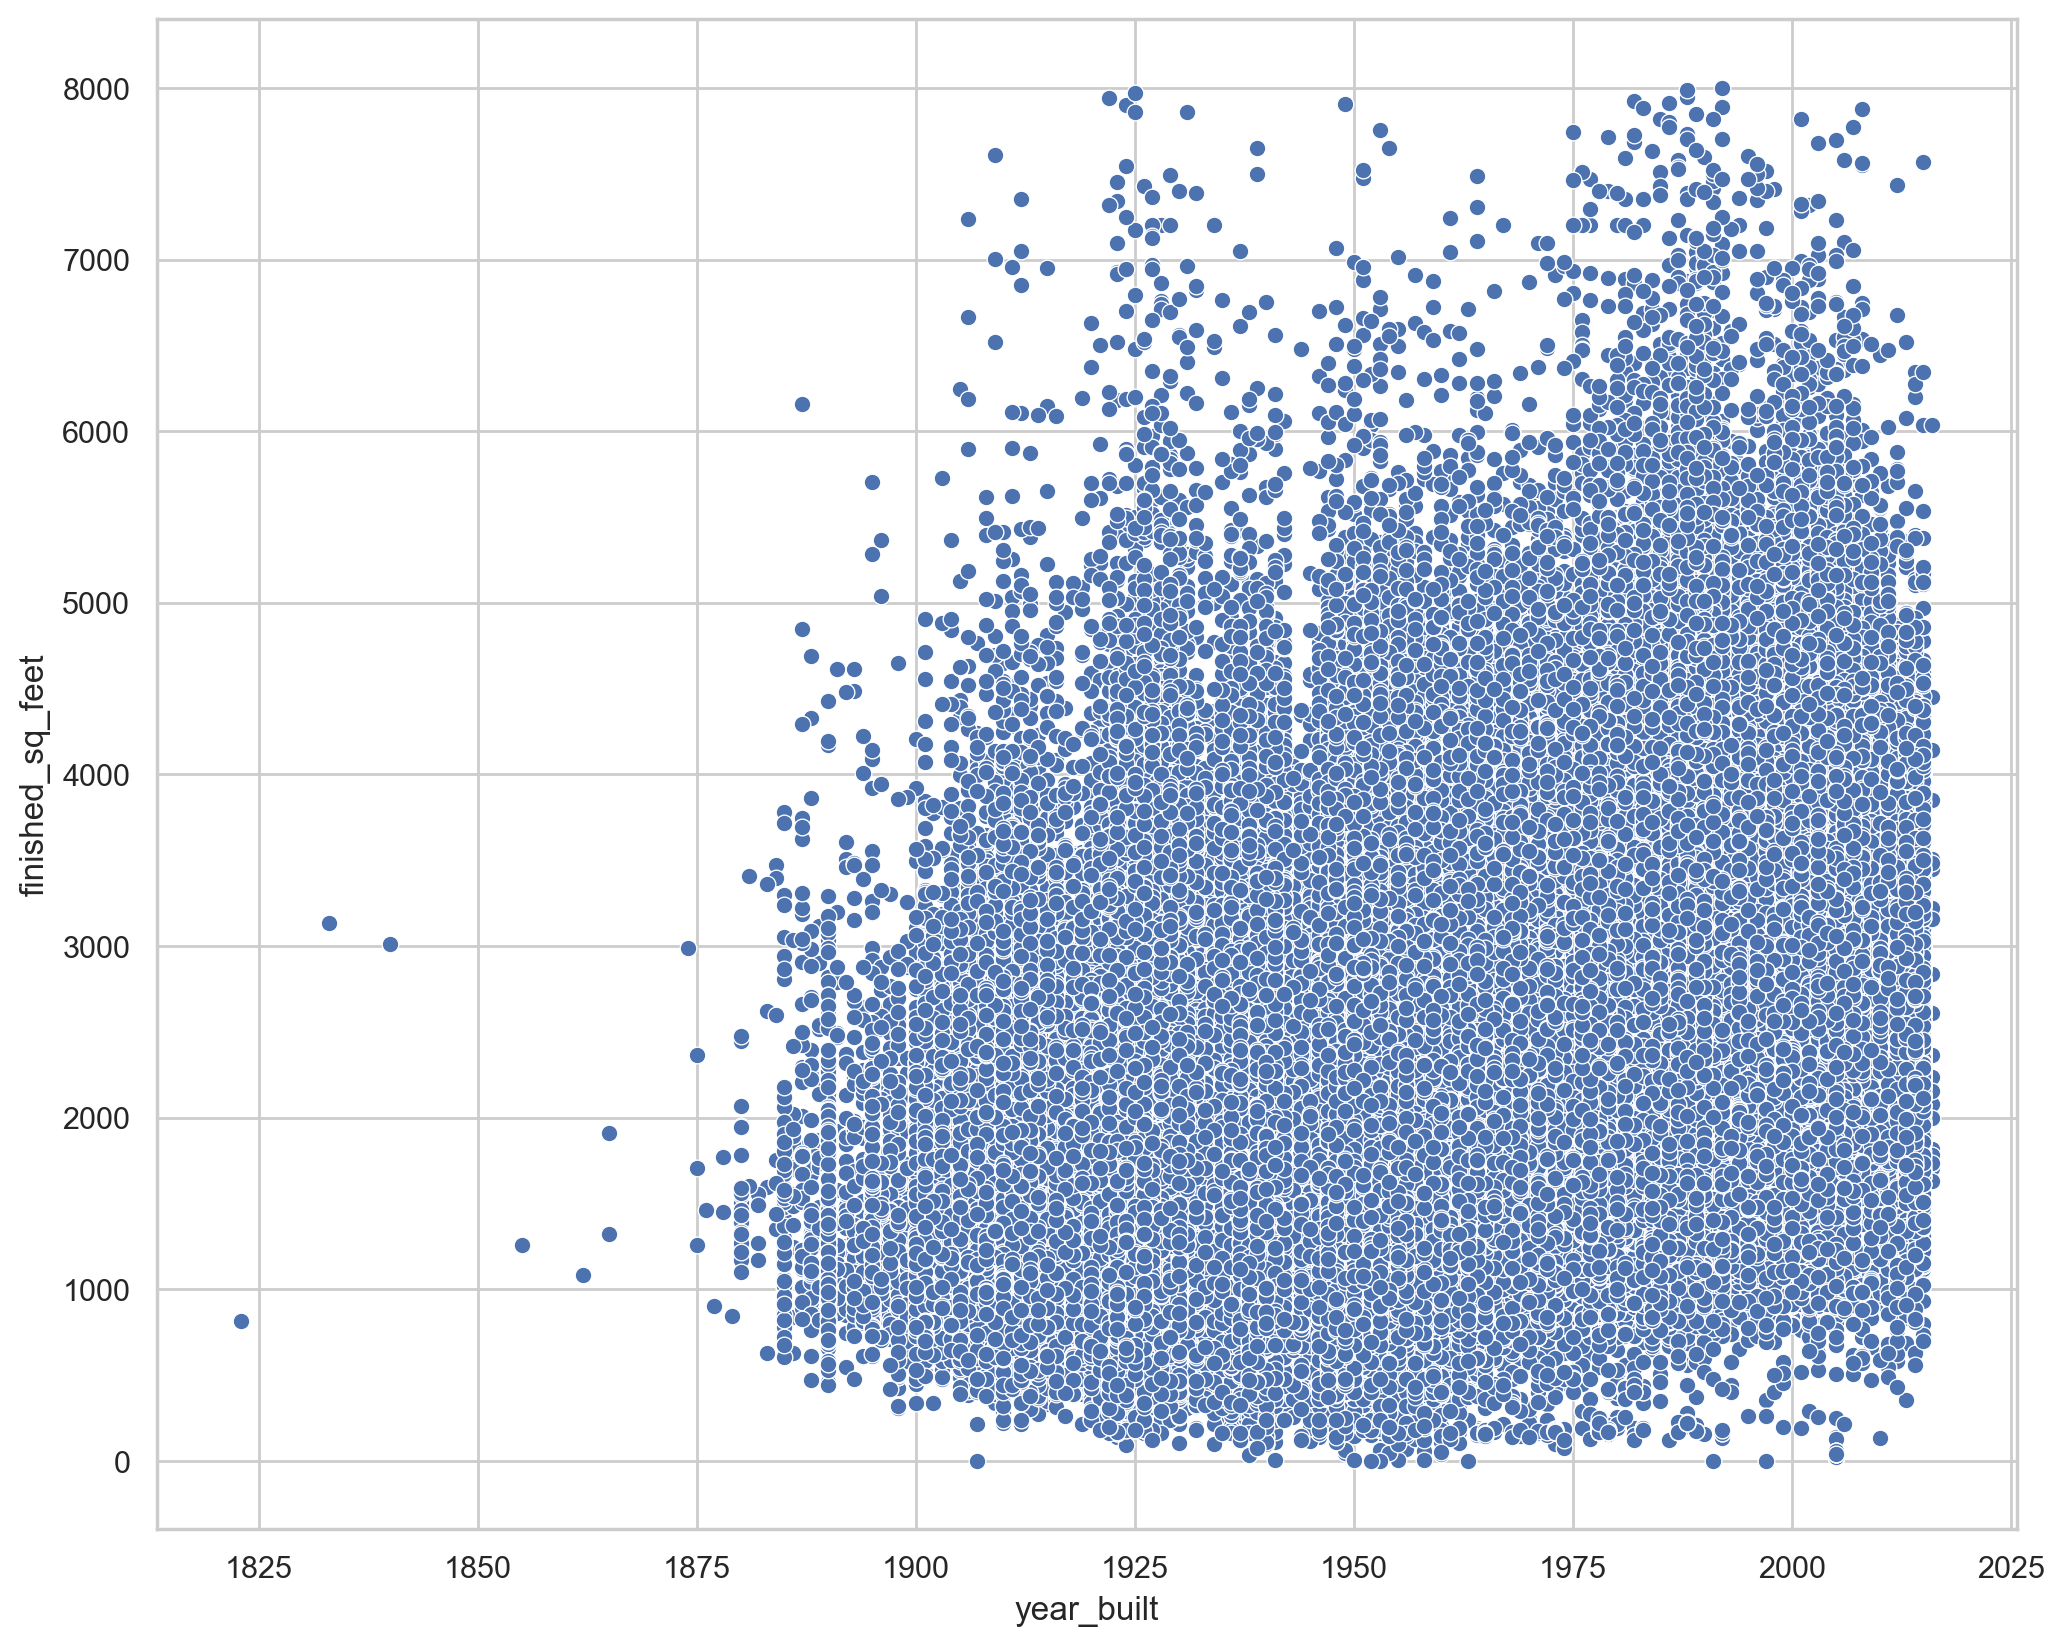

In [25]:

plt.figure(figsize = (12, 10))
sns.set(style = "whitegrid")
sns.scatterplot(x = "year_built", y = "finished_sq_feet", data = X_train)

plt.show()

In [27]:
X_train.dtypes

bedroom_count         int64
bath_count          float64
finished_sq_feet    float64
year_built            int64
fips                  int64
dtype: object

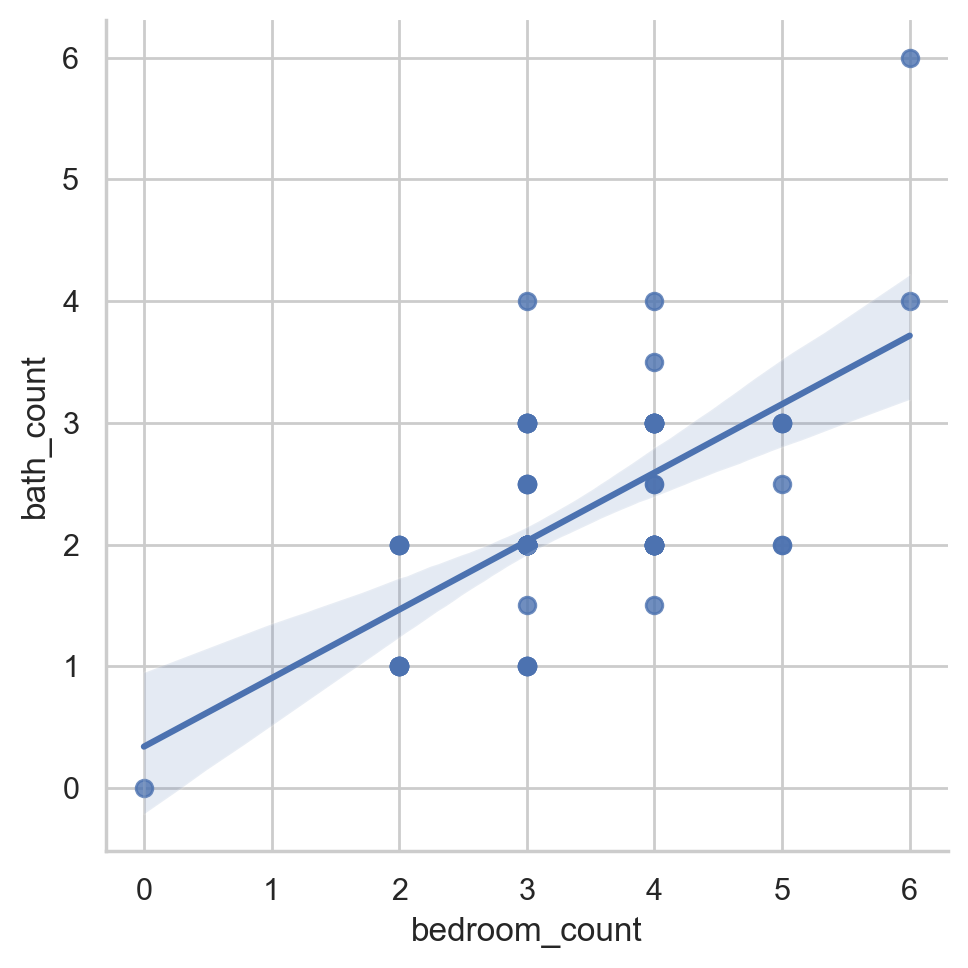

In [28]:
sns.lmplot(x = "bedroom_count", y = "bath_count", data = train.sample(100))